In [115]:
import numpy as np
import matplotlib.pyplot as plt 
import math
from numpy.random import default_rng

### The following code is an adaptation of the code of Bogacz, R. (2017).

## [1] Classic case - $g$ known

### $g(x) = x^2$ with 2 features $x_1, x_2$

$\phi = \epsilon_{x_1}g'(\phi) + \epsilon_{x_2}g'(\phi) - \epsilon_p $

$\epsilon_p = \phi - S - \Sigma_p\epsilon_p$

$\epsilon_{x_1} = x_1 - g(\phi) - \Sigma_{x_1}\epsilon_{x_1} $

$\epsilon_{x_2} = x_2 - g(\phi) - \Sigma_{x_2}\epsilon_{x_2}$

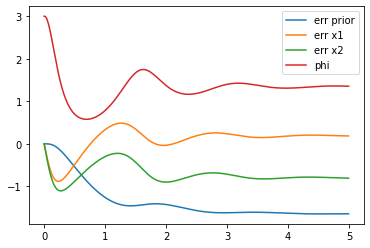

In [134]:
S=3
Sigma_p = 1
Sigma_x1 = 1
Sigma_x2 = 1
x1 = 2
x2 = 1
DT = 0.01
MAXT = 5

phi = [S]
error_p = [0]
error_x1 = [0]
error_x2 = [0]

for i in range(1, int(MAXT/DT)):
	phi.append(phi[i-1] + DT * (- error_p[i-1] + error_x1[i-1]*(2*phi[i-1]) + error_x2[i-1]*(2*phi[i-1])))
	error_p.append(error_p[i-1] + DT * (phi[i-1] - S - Sigma_p * error_p[i-1]))
	error_x1.append(error_x1[i-1] + DT * (x1 - phi[i-1]**2 - Sigma_x1 * error_x1[i-1]))
	error_x2.append(error_x2[i-1] + DT * (x2 - phi[i-1]**2 - Sigma_x2 * error_x2[i-1]))

plt.plot(np.arange(0,MAXT,DT), error_p, label='err prior')
plt.plot(np.arange(0,MAXT,DT), error_x1, label='err x1')
plt.plot(np.arange(0,MAXT,DT), error_x2, label='err x2')
plt.plot(np.arange(0,MAXT,DT), phi, label='phi')
plt.legend()
plt.show()

## [2] Adapted case - $g$ known
### $g(x)=x$ with 2 features $x_1, x_2$


$\phi = \epsilon_{x_1} + \epsilon_{x_2} - \epsilon_p $

$\epsilon_p = \phi - S - \Sigma_p\epsilon_p$

$\epsilon_{x_1} = x_1 - \phi - \Sigma_{x_1}\epsilon_{x_1} $

$\epsilon_{x_2} = x_2 - \phi - \Sigma_{x_2}\epsilon_{x_2}$

In [54]:
S=3
Sigma_p = 1
Sigma_x1 = 1
Sigma_x2 = 1
x1 = 2
x2 = 1
DT = 0.01
MAXT = 10

phi = [S]
error_p = [0]
error_x1 = [0]
error_x2 = [0]

for i in range(1, int(MAXT/DT)):
	phi.append(phi[i-1] + DT * (- error_p[i-1] + error_x1[i-1] + error_x2[i-1]))
	error_p.append(error_p[i-1] + DT * (phi[i-1] - S - Sigma_p * error_p[i-1]))
	error_x1.append(error_x1[i-1] + DT * (-phi[i-1] + x1 - Sigma_x1 * error_x1[i-1]))
	error_x2.append(error_x2[i-1] + DT * (-phi[i-1] + x2 - Sigma_x2 * error_x2[i-1]))

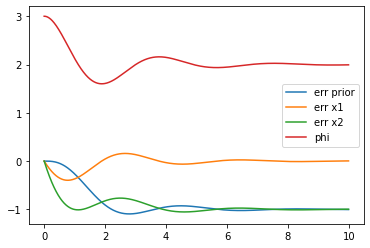

In [55]:
plt.plot(np.arange(0,MAXT,DT), error_p, label='err prior')
plt.plot(np.arange(0,MAXT,DT), error_x1, label='err x1')
plt.plot(np.arange(0,MAXT,DT), error_x2, label='err x2')
plt.plot(np.arange(0,MAXT,DT), phi, label='phi')
plt.legend()
plt.show()

## [3.1] Adapted case - $g$ unknown
### $g(S, \theta) = \theta v$, with 2 features $x_1, x_2$

$\phi = \theta \epsilon_{x_1} + \theta \epsilon_{x_2} - \epsilon_p $

$\epsilon_p = \phi - S - \Sigma_p\epsilon_p$

$\epsilon_{x_1} = x_1 - \theta\phi - \Sigma_{x_1}\epsilon_{x_1}$

$\epsilon_{x_2} = x_2 - \theta\phi - \Sigma_{x_2}\epsilon_{x_2}$

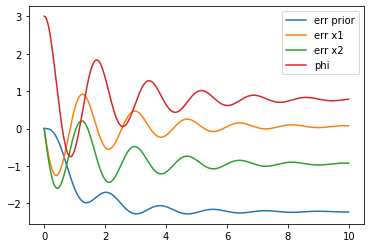

In [135]:
S=3
Sigma_p = 1
Sigma_x1 = 1
Sigma_x2 = 1
x1 = 2
x2 = 1
DT = 0.01
MAXT = 10
theta = 2.5

phi = [S]
error_p = [0]
error_x1 = [0]
error_x2 = [0]

for i in range(1, int(MAXT/DT)):
	phi.append(phi[i-1] + DT * (- error_p[i-1] + theta*error_x1[i-1] + theta*error_x2[i-1]))
	error_p.append(error_p[i-1] + DT * (phi[i-1] - S - Sigma_p * error_p[i-1]))
	error_x1.append(error_x1[i-1] + DT * (-theta*phi[i-1] + x1 - Sigma_x1 * error_x1[i-1]))
	error_x2.append(error_x2[i-1] + DT * (-theta*phi[i-1] + x2 - Sigma_x2 * error_x2[i-1]))

plt.plot(np.arange(0,MAXT,DT), error_p, label='err prior')
plt.plot(np.arange(0,MAXT,DT), error_x1, label='err x1')
plt.plot(np.arange(0,MAXT,DT), error_x2, label='err x2')
plt.plot(np.arange(0,MAXT,DT), phi, label='phi')
plt.legend()
plt.show()

## [3.2] Same as [3.1] with added variance to one of the features
### Faster convergence

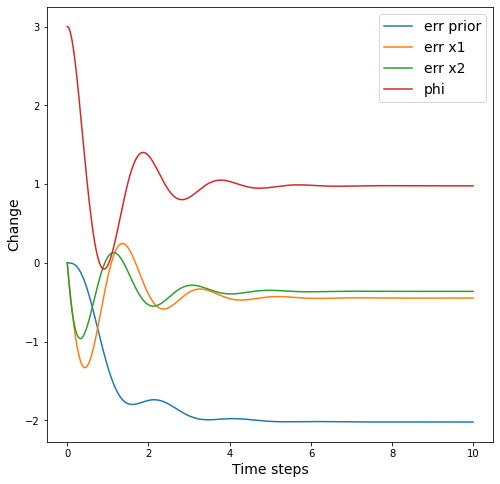

In [632]:
S=3
Sigma_p = 1
Sigma_x1 = 1
Sigma_x2 = 4
x1 = 2
x2 = 1
DT = 0.01
MAXT = 10
theta = 2.5

phi = [S]
error_p = [0]
error_x1 = [0]
error_x2 = [0]

for i in range(1, int(MAXT/DT)):
	phi.append(phi[i-1] + DT * (- error_p[i-1] + theta*error_x1[i-1] + theta*error_x2[i-1]))
	error_p.append(error_p[i-1] + DT * (phi[i-1] - S - Sigma_p * error_p[i-1]))
	error_x1.append(error_x1[i-1] + DT * (-theta*phi[i-1] + x1 - Sigma_x1 * error_x1[i-1]))
	error_x2.append(error_x2[i-1] + DT * (-theta*phi[i-1] + x2 - Sigma_x2 * error_x2[i-1]))

    
f = plt.figure()

plt.plot(np.arange(0,MAXT,DT), error_p, label='err prior')
plt.plot(np.arange(0,MAXT,DT), error_x1, label='err x1')
plt.plot(np.arange(0,MAXT,DT), error_x2, label='err x2')
plt.plot(np.arange(0,MAXT,DT), phi, label='phi')
plt.legend(fontsize = 14)
plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel("Time steps", fontsize = 14)
plt.ylabel("Change", fontsize = 14)
plt.show()

f.savefig('err_change.png')

## [4] Free energy

### $p(S|x_1,x_2) = q(S) = \phi$

### $ln[p(u)] = F + KL(q(S),p(S|x))$

### [4.1] Learning vairance of a single prediction error node

Text(0, 0.5, 'Sigma')

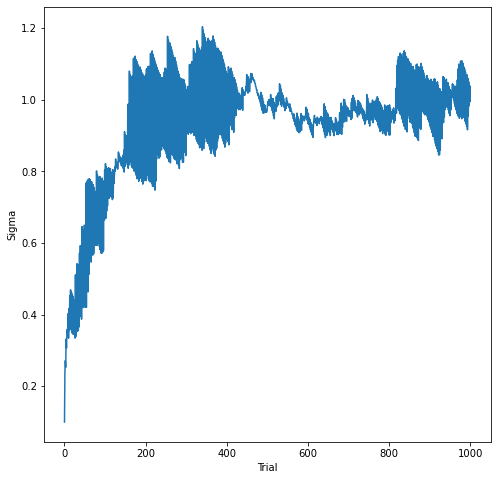

In [633]:
mean_phi = 5 # mean of input from the current level
Sigma_phi = 1 # variance of input from the current level 
phi_above = 5 # input from the level above
DT = 0.01 # integration step
MAXT = 20 # maximum time considered
TRIALS = 1000 # number of simulated trials
LRATE = 0.01 # learning rate

Sigma = [0.1] # initializing the value of weight
rng = default_rng()

for trial in range(TRIALS):
    error = [0] # initializing the prediction error
    e = [0] # initializing the interneuron
    phi = mean_phi + math.sqrt(Sigma_phi) * rng.standard_normal(1)[0]

    for i in range(int(MAXT/DT)):
        error.append(error[i-1] + DT * (phi - phi_above - e[i-1]))
        e.append(e[i-1] + DT * (Sigma[trial-1] * error[i-1] - e[i-1]))

    Sigma.append(Sigma[trial-1] + LRATE * (error[-1]*e[-1]- 1))


plt.plot(Sigma)
plt.xlabel("Trial")
plt.ylabel("Sigma")

## [4.2] Learn variances and prediction errors jointly

### $S = \frac{\phi-S}{\Sigma_p}$
### $\Sigma_p = \frac{1}{2}\Big( \frac{(\phi-S)^2}{\Sigma_p^2} -\frac{1}{\Sigma_p} \Big)$
### $\Sigma_{x_1} = \frac{1}{2}\Big( \frac{(x_1-\theta\phi)^2}{\Sigma_{x_1}^2} - \frac{1}{\Sigma_{x_1}}\Big)$
### $\Sigma_{x_2} = \frac{1}{2}\Big( \frac{(x_2-\theta\phi)^2}{\Sigma_{x_2}^2} - \frac{1}{\Sigma_{x_2}}\Big)$

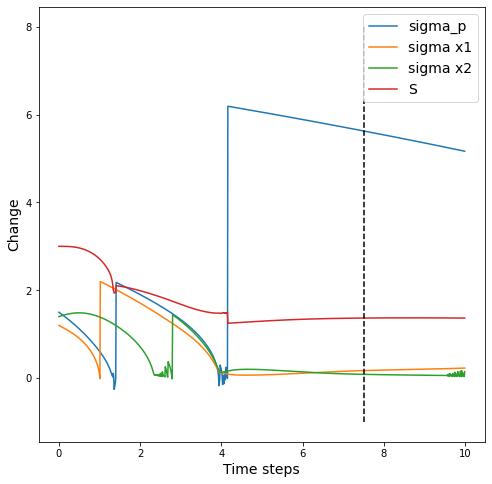

In [628]:
x1 = 2
x2 = 1

Sigma_p = [1.5]
Sigma_x1 = [1.2]
Sigma_x2 = [1.4]
S = [3]

DT = 0.01
MAXT = 10
theta = 1

phi = [S[0]]
error_p = [0]
error_x1 = [0]
error_x2 = [0]

for i in range(1, int(MAXT/DT)):
    S.append(S[i-1] + DT * (phi[i-1]-S[i-1])/Sigma_p[i-1])
    Sigma_p.append(Sigma_p[i-1] + DT * (1/2 * (phi[i-1]-S[i-1])**2 / Sigma_p[i-1]**2 - 1/Sigma_p[i-1] ))
    Sigma_x1.append(Sigma_x1[i-1] + DT * (1/2 * (x1-theta*phi[i-1])**2/Sigma_x1[i-1]**2 - 1/Sigma_x1[i-1]))
    Sigma_x2.append(Sigma_x2[i-1] + DT * (1/2 * (x2-theta*phi[i-1])**2/Sigma_x2[i-1]**2 - 1/Sigma_x2[i-1]))

    phi.append(phi[i-1] + DT * (- error_p[i-1] + theta*error_x1[i-1] + theta*error_x2[i-1]))
    error_p.append(error_p[i-1] + DT * (phi[i-1] - S[i-1] - Sigma_p[i-1] * error_p[i-1]))
    error_x1.append(error_x1[i-1] + DT * (-theta*phi[i-1] + x1 - Sigma_x1[i-1] * error_x1[i-1]))
    error_x2.append(error_x2[i-1] + DT * (-theta*phi[i-1] + x2 - Sigma_x2[i-1] * error_x2[i-1]))

f = plt.figure()

plt.plot(np.arange(0,MAXT,DT), Sigma_p, label='sigma_p')
plt.plot(np.arange(0,MAXT,DT), Sigma_x1, label='sigma x1')
plt.plot(np.arange(0,MAXT,DT), Sigma_x2, label='sigma x2')
plt.plot(np.arange(0,MAXT,DT), S, label='S')
plt.legend(fontsize = 14)
plt.xlabel("Time steps", fontsize = 14)
plt.ylabel("Change", fontsize = 14)
plt.vlines(7.5,-1,8,color='k', linestyle='--')
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

f.savefig('var_orig.png')

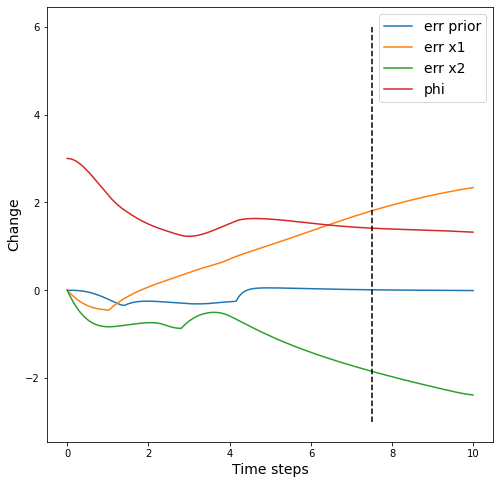

In [629]:
f = plt.figure()

plt.plot(np.arange(0,MAXT,DT), error_p, label='err prior')
plt.plot(np.arange(0,MAXT,DT), error_x1, label='err x1')
plt.plot(np.arange(0,MAXT,DT), error_x2, label='err x2')
plt.plot(np.arange(0,MAXT,DT), phi, label='phi')
plt.legend(fontsize = 14)
plt.vlines(7.5,-3,6,color='k', linestyle='--')
plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel("Time steps", fontsize = 14)
plt.ylabel("Change", fontsize = 14)
plt.show()

f.savefig('pred_orig.png')

### Hypothesising that the system receives different values for $x_2$ and $S$

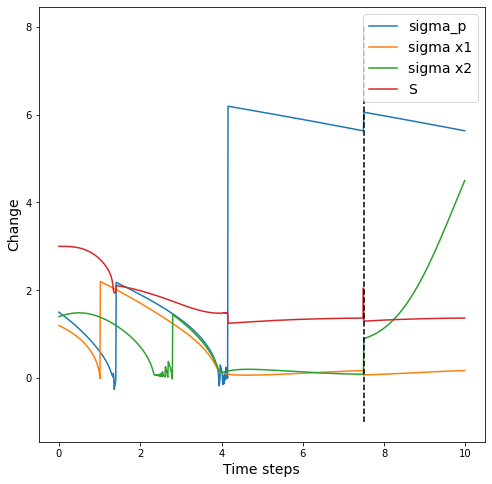

In [630]:
x1 = 2
x2 = 1

Sigma_p = [1.5]
Sigma_x1 = [1.2]
Sigma_x2 = [1.4]
S = [3]

DT = 0.01
MAXT = 5
theta = 1

phi = [S[0]]
error_p = [0]
error_x1 = [0]
error_x2 = [0]

for i in range(1, int(MAXT/DT)+int(MAXT/DT/2)):
    S.append(S[i-1] + DT * (phi[i-1]-S[i-1])/Sigma_p[i-1])
    Sigma_p.append(Sigma_p[i-1] + DT * (1/2 * (phi[i-1]-S[i-1])**2 / Sigma_p[i-1]**2 - 1/Sigma_p[i-1] ))

    Sigma_x1.append(Sigma_x1[i-1] + DT * (1/2 * (x1-theta*phi[i-1])**2/Sigma_x1[i-1]**2 - 1/Sigma_x1[i-1]))
    Sigma_x2.append(Sigma_x2[i-1] + DT * (1/2 * (x2-theta*phi[i-1])**2/Sigma_x2[i-1]**2 - 1/Sigma_x2[i-1]))

    phi.append(phi[i-1] + DT * (- error_p[i-1] + theta*error_x1[i-1] + theta*error_x2[i-1]))
    error_p.append(error_p[i-1] + DT * (phi[i-1] - S[i-1] - Sigma_p[i-1] * error_p[i-1]))
    error_x1.append(error_x1[i-1] + DT * (-theta*phi[i-1] + x1 - Sigma_x1[i-1] * error_x1[i-1]))
    error_x2.append(error_x2[i-1] + DT * (-theta*phi[i-1] + x2 - Sigma_x2[i-1] * error_x2[i-1]))


# x1 = 2
x2 = 4
S[-1] = S[-1] + S[-1]*0.5

for j in range(1, int(MAXT/DT/2)):
    i = int(MAXT/DT) - 1 + j
    S.append(S[i-1] + DT * (phi[i-1]-S[i-1])/Sigma_p[i-1])
    Sigma_p.append(Sigma_p[i-1] + DT * (1/2 * (phi[i-1]-S[i-1])**2 / Sigma_p[i-1]**2 - 1/Sigma_p[i-1] ))

    Sigma_x1.append(Sigma_x1[i-1] + DT * (1/2 * (x1-theta*phi[i-1])**2/Sigma_x1[i-1]**2 - 1/Sigma_x1[i-1]))
    Sigma_x2.append(Sigma_x2[i-1] + DT * (1/2 * (x2-theta*phi[i-1])**2/Sigma_x2[i-1]**2 - 1/Sigma_x2[i-1]))

    phi.append(phi[i-1] + DT * (- error_p[i-1] + theta*error_x1[i-1] + theta*error_x2[i-1]))
    error_p.append(error_p[i-1] + DT * (phi[i-1] - S[i-1] - Sigma_p[i-1] * error_p[i-1]))
    error_x1.append(error_x1[i-1] + DT * (-theta*phi[i-1] + x1 - Sigma_x1[i-1] * error_x1[i-1]))
    error_x2.append(error_x2[i-1] + DT * (-theta*phi[i-1] + x2 - Sigma_x2[i-1] * error_x2[i-1]))
    

f = plt.figure()

plt.plot(np.arange(0,MAXT*2-DT,DT), Sigma_p, label='sigma_p')
plt.plot(np.arange(0,MAXT*2-DT,DT), Sigma_x1, label='sigma x1')
plt.plot(np.arange(0,MAXT*2-DT,DT), Sigma_x2, label='sigma x2')
plt.plot(np.arange(0,MAXT*2-DT,DT), S, label='S')
plt.legend(fontsize = 14)
plt.xlabel("Time steps", fontsize = 14)
plt.ylabel("Change", fontsize = 14)
plt.vlines(7.5,-1,8,color='k', linestyle='--')
plt.rcParams["figure.figsize"] = (8,8)
plt.show()

f.savefig('var_mod.png')

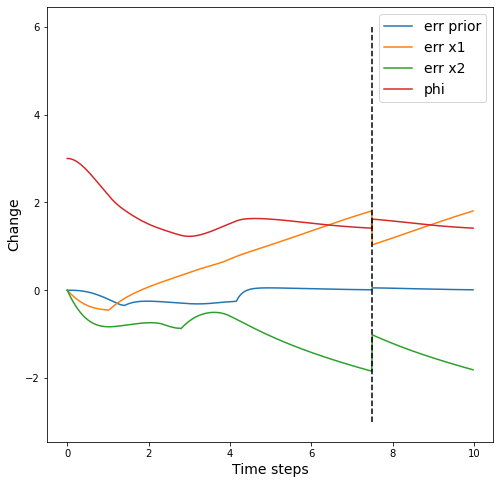

In [631]:
f = plt.figure()
plt.plot(np.arange(0,MAXT*2-DT,DT), error_p, label='err prior')
plt.plot(np.arange(0,MAXT*2-DT,DT), error_x1, label='err x1')
plt.plot(np.arange(0,MAXT*2-DT,DT), error_x2, label='err x2')
plt.plot(np.arange(0,MAXT*2-DT,DT), phi, label='phi')
plt.legend(fontsize = 14)
plt.vlines(7.5,-3,6,color='k', linestyle='--')
plt.rcParams["figure.figsize"] = (8,8)
plt.xlabel("Time steps", fontsize = 14)
plt.ylabel("Change", fontsize = 14)
plt.show()

f.savefig('pred_mod.png')

## Scaling the model up: Matrix notation

$\phi = \theta \epsilon_{x_1} + \theta \epsilon_{x_2} - \epsilon_p $

$\epsilon_p = \phi - v_p - \Sigma_p\epsilon_p$

$\epsilon_{x_1} = x_1 - \theta\phi - \Sigma_{x_1}\epsilon_{x_1}$

$\epsilon_{x_2} = x_2 - \theta\phi - \Sigma_{x_2}\epsilon_{x_2}$

In [297]:
N = 2

S = np.ones(N)*3
Sigma_p = np.ones((N,N))
Sigma_x1 = np.ones((N,N))*3
Sigma_x2 = np.ones((N,N))
x1 = np.ones(N)*2
x2 = np.ones(N)
DT = 0.01
MAXT = 10
theta = np.ones((N,N))*2.5

phi = np.array([S])
error_p = np.zeros((1,N))
error_x1 = np.zeros((1,N))
error_x2 = np.zeros((1,N))


for i in range(1, int(MAXT/DT)):
    phi = np.vstack((phi,phi[i-1] + DT * (- error_p[i-1] + np.inner(theta,error_x1[i-1]) + np.inner(theta,error_x2[i-1]))))
    error_p = np.vstack((error_p, error_p[i-1] + DT * (phi[i-1] - S - np.inner(Sigma_p,error_p[i-1]))))
    error_x1 = np.vstack((error_x1, error_x1[i-1] + DT * (np.inner(-theta,phi[i-1]) + x1 - np.inner(Sigma_x1,error_x1[i-1]))))
    error_x2 = np.vstack((error_x2, error_x2[i-1] + DT * (np.inner(-theta,phi[i-1]) + x2 - np.inner(Sigma_x2,error_x2[i-1]))))


In [292]:
X = np.arange(0,MAXT,DT)
Y = np.arange(0,MAXT,DT)
X, Y = np.meshgrid(X, Y)

In [307]:
Z = np.array([np.arange(0,MAXT,DT),np.arange(0,MAXT,DT)])

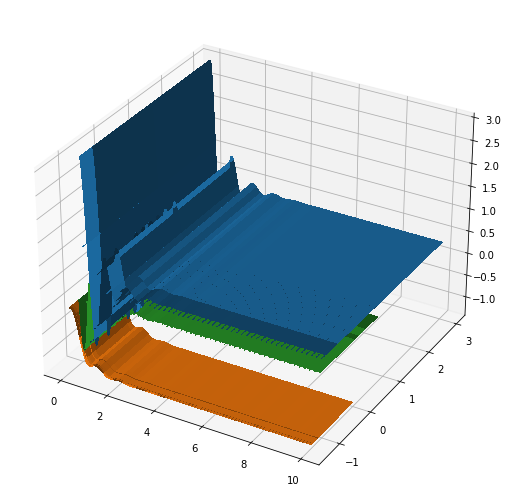

In [347]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"},figsize =(14, 9))
surf = ax.plot_surface(Z, X, Y,
                       linewidth=2, antialiased=False)

surf = ax.plot_surface(Z, X2, Y2,
                       linewidth=3, antialiased=False)

surf = ax.plot_surface(Z, X3, Y3,
                       linewidth=3, antialiased=False)

plt.show()

## References

Bogacz, R. (2017). A tutorial on the free-energy framework for modelling perception and learning. Journal of mathematical psychology, 76, 198-211.